# Kernel PCA
 - Non-linear dimensionality reduction through the use of kernels

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
from sklearn.datasets import make_circles

In [20]:
from sklearn.decomposition import PCA, KernelPCA

In [14]:
np.random.seed(0)

In [15]:
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)

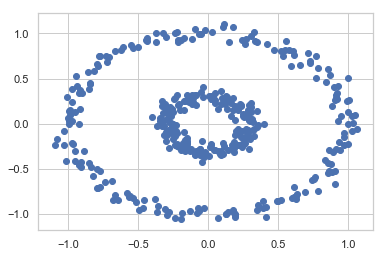

In [34]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1]);

In [21]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)

In [23]:
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca) #Pure principal components left
pca = PCA()
X_pca = pca.fit_transform(X)

In [26]:
pd.Series(y).value_counts()

1    200
0    200
dtype: int64

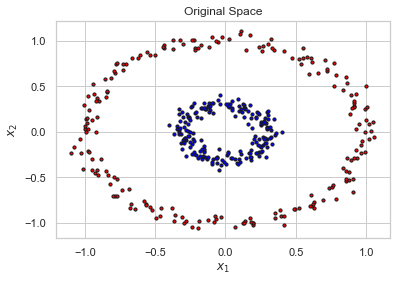

In [33]:
plt.figure()
plt.title('Original Space')
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=10, edgecolors='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=10, edgecolors='k')
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

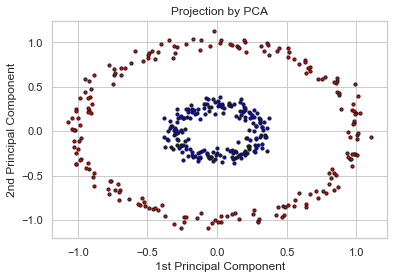

In [35]:
plt.figure()
plt.title('Projection by PCA')
reds = y == 0
blues = y == 1

plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=10, edgecolors='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=10, edgecolors='k')
plt.xlabel("1st Principal Component");
plt.ylabel("2nd Principal Component");

Regular PCA was not able to do much of anything. Kernel PCA should do better

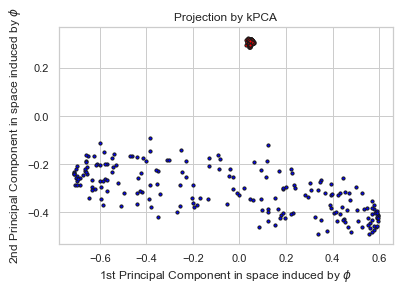

In [36]:
plt.figure()
plt.title('Projection by kPCA')
reds = y == 0
blues = y == 1

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=10, edgecolors='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=10, edgecolors='k')
plt.xlabel("1st Principal Component in space induced by $\phi$");
plt.ylabel("2nd Principal Component in space induced by $\phi$");

## Kernel PCA Example

#### Using Kernel PCA to make classification better

In [57]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [58]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [59]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression()
clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

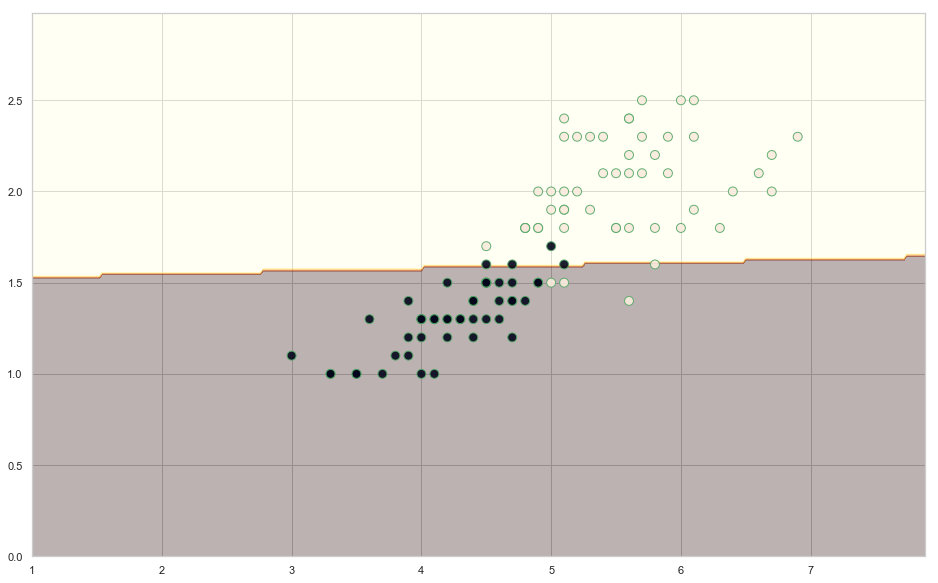

In [69]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
           alpha=0.9, edgecolors='g');

Looks like 9 misclassified.

In [70]:
clf.fit(X_kpca, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

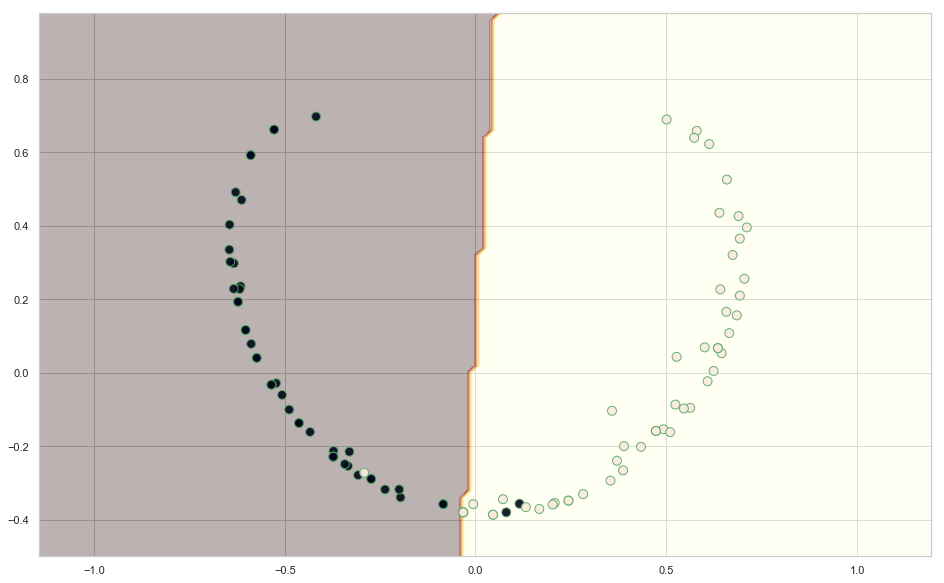

In [72]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min() - 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, s=80,
           alpha=0.9, edgecolors='g');

Using kernel PCA, we now have 3 errors